<a href="https://colab.research.google.com/github/koushik1234/machine_learning/blob/master/DM_antu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load packages
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn import preprocessing
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.models import load_model
import numpy as np
import warnings

In [0]:
warnings.filterwarnings('ignore')

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [61]:
# summarize size
print("Training data: ")
print(X.shape,y.shape)

Training data: 
(50000,) (50000,)


In [62]:
#Number of classes
print("Classes we have: ")
print(np.unique(y))

Classes we have: 
[0 1]


In [64]:
X_train[:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [0]:
y_train[:10]

In [0]:
#normalize the data
# normalize the data attributes
#X_train = preprocessing.normalize(X_train)
#X_test= preprocessing.normalize(X_test)

In [0]:
## create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
#we have used 1D conv with relu activation where padding will be the same --appending 0 
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
#Block 2
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
#Block 3
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
#add desnse layer1
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))
#add desnse layer2
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))
#add desnse layer 3
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

In [66]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 250, 64)           6208      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 125, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 125, 128)          24704     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 62, 128)          

In [67]:
# Fit the model
epochs=20
batch=128
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
his=model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch,
    validation_data=(X_test, y_test),
    verbose = 1,callbacks=[es],
    shuffle=True)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 67s 3ms/step - loss: 0.6938 - acc: 0.5018 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/20
25000/25000 [==============================] - 67s 3ms/step - loss: 0.4703 - acc: 0.7467 - val_loss: 0.2795 - val_acc: 0.8843
Epoch 3/20
25000/25000 [==============================] - 69s 3ms/step - loss: 0.2332 - acc: 0.9113 - val_loss: 0.2818 - val_acc: 0.8843
Epoch 4/20
25000/25000 [==============================] - 67s 3ms/step - loss: 0.1686 - acc: 0.9390 - val_loss: 0.2979 - val_acc: 0.8812
Epoch 5/20
25000/25000 [==============================] - 68s 3ms/step - loss: 0.1170 - acc: 0.9615 - val_loss: 0.3526 - val_acc: 0.8805
Epoch 6/20
25000/25000 [==============================] - 66s 3ms/step - loss: 0.0793 - acc: 0.9741 - val_loss: 0.3724 - val_acc: 0.8861
Epoch 7/20
25000/25000 [==============================] - 68s 3ms/step - loss: 0.0533 - acc: 0.9826 - val_loss: 0.4597 - val_acc

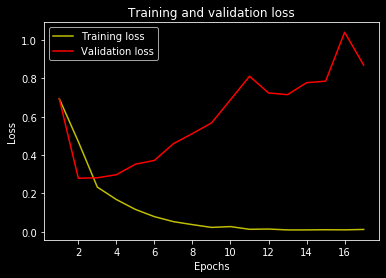

In [68]:
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

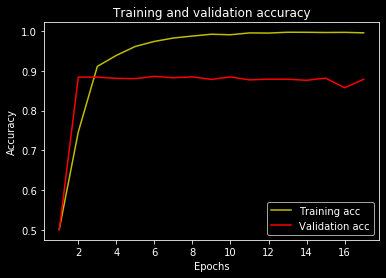

In [69]:
acc = his.history['acc']
val_acc = his.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
#save model
model.save("model.h5")
# load model
sentiment_analysis = load_model('model.h5')
# evaluate the model
_, train_acc = sentiment_analysis.evaluate(X_train,y_train, verbose=1)
_, test_acc = sentiment_analysis.evaluate(X_test,y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

25000/25000 [==============================] - 16s 636us/step
Train: 0.999, Test: 0.879


Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.bold text

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
downloaded=files.download("model.h5")